# 1- Importation des librairies pour tester les différents modèles

In [ ]:
pip install lazypredict

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from timeit import timeit
import os

In [40]:
train = pd.read_csv('train_final.csv')

In [41]:
train.set_index('id', inplace = True)

In [42]:
train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,employment,savings_status,sex,other_parties,own_telephone,foreign_worker,class,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,status_matrimonial_div/dep/mar,status_matrimonial_div/sep,status_matrimonial_mar/wid,status_matrimonial_single,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,0.62,2.01,-1.75,-0.73,-0.44,-0.70,-0.43,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
536,1.99,1.03,0.02,-0.73,-0.64,1.08,-0.43,1,2,1,1,2,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
696,-1.31,-0.13,-0.87,-0.73,0.07,-0.70,-0.43,2,2,1,1,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
558,-0.06,-0.84,0.90,1.11,0.17,-0.70,2.31,2,4,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0
837,-0.06,-0.46,0.90,-0.73,-1.05,1.08,-0.43,0,2,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1.31,-0.20,0.90,1.11,-1.15,-0.70,-0.43,1,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
271,0.62,-0.19,0.90,1.11,0.07,-0.70,-0.43,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
861,-0.63,-0.46,0.02,-1.65,-0.64,1.08,-0.43,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1


# 2- Determination de la target value et split du dataset

In [43]:
y= train['class']
del train['class']
X = train

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [45]:
X_train.shape

(568, 47)

In [46]:
y_train.shape

(568,)

In [47]:
X_test.shape

(143, 47)

In [48]:
y_test.shape

(143,)

# 3- Teste des diiférents algorithmes de façon native

In [11]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 13.62it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.73,0.65,0.65,0.73,0.07
XGBClassifier,0.73,0.63,0.63,0.73,0.18
LogisticRegression,0.71,0.62,0.62,0.71,0.03
KNeighborsClassifier,0.73,0.62,0.62,0.72,0.03
AdaBoostClassifier,0.71,0.62,0.62,0.71,0.13
RidgeClassifierCV,0.71,0.61,0.61,0.71,0.03
RidgeClassifier,0.71,0.61,0.61,0.71,0.03
LinearSVC,0.71,0.61,0.61,0.71,0.12
LinearDiscriminantAnalysis,0.71,0.61,0.61,0.70,0.04


# 4- Application du GridSearch pour trouver les hyperparamètres optimaux pour les modèles 

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, f1_score, recall_score,roc_auc_score, roc_curve


In [134]:
# Pour la RL

paramRL = {
    'penalty': ['l1','l2','elasticnet','none'],
    'C' : [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02],
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}

gridRL = GridSearchCV(LogisticRegression(), paramRL, cv = 5)
gridRL.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [135]:
gridRL.best_score_

0.7359416239714329

In [136]:
gridRL.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [137]:
modelRL = gridRL.best_estimator_
modelRL.score(X_test, y_test)

0.7132867132867133

In [138]:
RL = LogisticRegression(C = 1, penalty= 'l1', solver='saga')
RL.fit(X_train, y_train)
y_pred_RL = RL.predict(X_test)
print(accuracy_score(y_pred_RL, y_test))
print(confusion_matrix(y_test, y_pred_RL))
print(classification_report(y_test, y_pred_RL))

0.7132867132867133
[[15 22]
 [19 87]]
              precision    recall  f1-score   support

           0       0.44      0.41      0.42        37
           1       0.80      0.82      0.81       106

    accuracy                           0.71       143
   macro avg       0.62      0.61      0.62       143
weighted avg       0.71      0.71      0.71       143



# a- Pour le KNN

In [50]:
paramKNN = {'n_neighbors': np.arange(2, 33),
            'weights': ['uniform','distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'metric': ['euclidean','manhattan', 'minkowski']}
gridKNN = GridSearchCV(KNeighborsClassifier(), paramKNN, cv=5)
gridKNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                         'weights': ['uniform', 'distance']})

In [51]:
gridKNN.best_score_

0.7412047818661699

In [52]:
gridKNN.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 28,
 'weights': 'distance'}

In [53]:
modelKNN = gridKNN.best_estimator_
modelKNN.score(X_test, y_test)


0.7622377622377622

In [117]:
KNN = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  28,
 weights= 'distance')

KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
print(accuracy_score(y_pred_KNN, y_test))
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

0.7622377622377622
[[11 26]
 [ 8 98]]
              precision    recall  f1-score   support

           0       0.58      0.30      0.39        37
           1       0.79      0.92      0.85       106

    accuracy                           0.76       143
   macro avg       0.68      0.61      0.62       143
weighted avg       0.74      0.76      0.73       143



# b- Pour Naive-Bayes

In [69]:
paramNB = {'alpha' : np.arange(1e-3, 13),
           
           }
gridNB = GridSearchCV(BernoulliNB(), paramNB, cv=5)
gridNB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01])})

In [70]:
gridNB.best_score_

0.7342648657040833

In [71]:
gridNB.best_params_

{'alpha': 11.000999999999998}

In [72]:
modelNB = gridNB.best_estimator_
modelNB.score(X_test, y_test)

0.7132867132867133

In [115]:
NB = BernoulliNB(alpha = 11.000999999999998)

NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)
print(accuracy_score(y_pred_NB, y_test))
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

0.7132867132867133
[[12 25]
 [16 90]]
              precision    recall  f1-score   support

           0       0.43      0.32      0.37        37
           1       0.78      0.85      0.81       106

    accuracy                           0.71       143
   macro avg       0.61      0.59      0.59       143
weighted avg       0.69      0.71      0.70       143



## c- Pour SVC

In [75]:
from sklearn.svm import SVC
paramSVC = {'C' : np.arange(15, 23),
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridSVC = GridSearchCV(SVC(), paramSVC, cv=5)
gridSVC.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([15, 16, 17, 18, 19, 20, 21, 22]),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [76]:
gridSVC.best_score_

0.764089427107592

In [77]:
gridSVC.best_params_

{'C': 17, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [79]:
modelSVC = gridSVC.best_estimator_
modelSVC.score(X_test, y_test)

0.6923076923076923

In [113]:
SVC = SVC()

SVC.fit(X_train, y_train)
y_pred_SVC = SVC.predict(X_test)
print(accuracy_score(y_pred_SVC, y_test))
print(confusion_matrix(y_test, y_pred_SVC))
print(classification_report(y_test, y_pred_SVC))

0.7342657342657343
[[ 6 31]
 [ 7 99]]
              precision    recall  f1-score   support

           0       0.46      0.16      0.24        37
           1       0.76      0.93      0.84       106

    accuracy                           0.73       143
   macro avg       0.61      0.55      0.54       143
weighted avg       0.68      0.73      0.68       143



## d- Pour la foret aléatoire

In [81]:
from sklearn.ensemble import RandomForestClassifier

paramRF = {'n_estimators' : np.arange(37, 41),
           'criterion' : ['gini', 'entropy'],
            'max_depth' : np.arange(11, 16),  
            'max_features': ['auto', 'sqrt', 'log2']
           }
gridRF = GridSearchCV(RandomForestClassifier(), paramRF, cv=5)
gridRF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([11, 12, 13, 14, 15]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([37, 38, 39, 40])})

In [82]:
gridRF.best_score_

0.7710914454277287

In [83]:
gridRF.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 39}

In [84]:
modelRF = gridRF.best_estimator_
modelRF.score(X_test, y_test)

0.7482517482517482

In [112]:
RF = RandomForestClassifier(criterion = 'entropy',
 max_depth = 15,
 max_features = 'auto',
 n_estimators = 39)

RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

0.7272727272727273
[[ 9 28]
 [11 95]]
              precision    recall  f1-score   support

           0       0.45      0.24      0.32        37
           1       0.77      0.90      0.83       106

    accuracy                           0.73       143
   macro avg       0.61      0.57      0.57       143
weighted avg       0.69      0.73      0.70       143



## e- Pour le Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

paramBG = {
    'n_estimators' : np.arange(7, 15),
    'max_samples' : np.arange(0.01, 5),
    'max_features' : np.arange(0.01, 5),
    'verbose' : np.arange(1, 5)
}

gridBG = GridSearchCV(BaggingClassifier(), paramBG, cv = 5)
gridBG.fit(X_train, y_train)

In [86]:
gridBG.best_score_

0.7077782952957616

In [87]:
gridBG.best_params_

{'max_features': 0.01, 'max_samples': 0.01, 'n_estimators': 14, 'verbose': 1}

In [88]:
modelBG = gridBG.best_estimator_
modelBG.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.7412587412587412

In [111]:
BG = BaggingClassifier(max_features= 0.01, max_samples= 0.01, n_estimators= 14, verbose= 1)

BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print(accuracy_score(y_pred_BG, y_test))
print(confusion_matrix(y_test, y_pred_BG))
print(classification_report(y_test, y_pred_BG))

0.6923076923076923
[[ 4 33]
 [11 95]]
              precision    recall  f1-score   support

           0       0.27      0.11      0.15        37
           1       0.74      0.90      0.81       106

    accuracy                           0.69       143
   macro avg       0.50      0.50      0.48       143
weighted avg       0.62      0.69      0.64       143



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


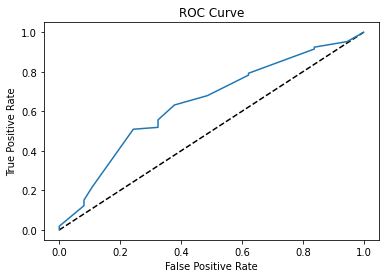

In [151]:
y_predBG_prob = modelBG.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_predBG_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# f- Pour NuSVC

In [17]:
from sklearn.svm import NuSVC
paramNuSVC = {
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridNuSVC = GridSearchCV(NuSVC(), paramNuSVC, cv=5)
gridNuSVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [90]:
gridNuSVC.best_score_

0.7535320602390934

In [91]:
gridNuSVC.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [92]:
modelNuSVC = gridNuSVC.best_estimator_
modelNuSVC.score(X_test, y_test)

0.7132867132867133

In [110]:
NuSVC = NuSVC(decision_function_shape ='ovo', gamma= 'scale', kernel= 'rbf')

NuSVC.fit(X_train, y_train)
y_pred_NuSVC = NuSVC.predict(X_test)
print(accuracy_score(y_pred_NuSVC, y_test))
print(confusion_matrix(y_test, y_pred_NuSVC))
print(classification_report(y_test, y_pred_NuSVC))

0.7132867132867133
[[12 25]
 [16 90]]
              precision    recall  f1-score   support

           0       0.43      0.32      0.37        37
           1       0.78      0.85      0.81       106

    accuracy                           0.71       143
   macro avg       0.61      0.59      0.59       143
weighted avg       0.69      0.71      0.70       143



# g- Pour XGBClassifier

In [24]:
from xgboost import XGBClassifier

paramXGB = { 
    'booster': ['gbtree','gblinear'],
    'eta' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2],
}
gridXGB = GridSearchCV(XGBClassifier(), paramXGB, cv=5)
gridXGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [94]:
gridXGB.best_score_

0.7729234590902034

In [95]:
gridXGB.best_params_

{'booster': 'gbtree', 'eta': 0.08}

In [96]:
modelXGB = gridXGB.best_estimator_
modelXGB.score(X_test, y_test)

0.7272727272727273

In [109]:
XGB = XGBClassifier(booster='gbtree', eta= 0.08)

XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
print(accuracy_score(y_pred_XGB, y_test))
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

0.7272727272727273
[[13 24]
 [15 91]]
              precision    recall  f1-score   support

           0       0.46      0.35      0.40        37
           1       0.79      0.86      0.82       106

    accuracy                           0.73       143
   macro avg       0.63      0.60      0.61       143
weighted avg       0.71      0.73      0.71       143



## h- Pour AdaBoostClassifier

In [123]:
from sklearn.ensemble import AdaBoostClassifier

paramAda = { 
    'n_estimators': np.arange(44, 62),
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state': np.arange(1, 10)
}
gridAda = GridSearchCV(AdaBoostClassifier(), paramAda, cv=5, scoring="accuracy")
gridAda.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61]),
                         'random_state': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [124]:
gridAda.best_score_

0.744822232572582

In [125]:
gridAda.best_params_

{'algorithm': 'SAMME', 'n_estimators': 57, 'random_state': 1}

In [126]:
modelAda = gridAda.best_estimator_
modelAda.score(X_test, y_test)

0.6923076923076923

In [127]:
Ada = AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 57, random_state= 1)

Ada.fit(X_train, y_train)
y_pred_Ada = Ada.predict(X_test)
print(accuracy_score(y_pred_Ada, y_test))
print(confusion_matrix(y_test, y_pred_Ada))
print(classification_report(y_test, y_pred_Ada))

0.6923076923076923
[[12 25]
 [19 87]]
              precision    recall  f1-score   support

           0       0.39      0.32      0.35        37
           1       0.78      0.82      0.80       106

    accuracy                           0.69       143
   macro avg       0.58      0.57      0.58       143
weighted avg       0.68      0.69      0.68       143



# 5- Validation Curve

In [144]:
from sklearn.model_selection import validation_curve

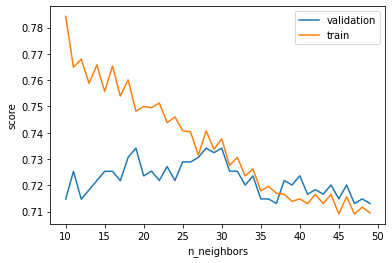

In [143]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
k = np.arange(10, 50)
train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv = 5)

plt.plot(k, val_score.mean(axis = 1), label = 'validation')
plt.plot(k, train_score.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()